# Webscraping course descriptions 

In [1]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.lse.ac.uk/study-at-lse/Undergraduate/degree-programmes-2024/BSc-Data-Science'
r = requests.get(url)
soup = BeautifulSoup(r.content,'lxml')

# Looking at the contents of the webpage
soup.contents

['html',
 <html lang="en-GB">
 <head>
 <!-- Page-hiding snippet -->
 <style>.async-hide { opacity: 0 !important} </style>
 <script>(function(a,s,y,n,c,h,i,d,e){s.className+=' '+y;h.start=1*new Date;
 	h.end=i=function(){s.className=s.className.replace(RegExp(' ?'+y),'')};
 	(a[n]=a[n]||[]).hide=h;setTimeout(function(){i();h.end=null},c);h.timeout=c;
 	})(window,document.documentElement,'async-hide','dataLayer',4000,
 	{'GTM-KJRJTJ8':true});</script>
 <!-- Modified Analytics tracking code with Optimize plugin -->
 <script>
       (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
           (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
           m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
        })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');
 
       ga('create', 'UA-80815225-1', 'auto', {allowLinker: true});   
       ga('require', 'GTM-KJRJTJ8');        

In [2]:
#Scraping the main div container of the webpage
course_summary = soup.find('div', attrs={'class': 'courseSummary'})

course_summary

<div class="courseSummary">
<article class="pageContent">
</article>
<p>Our BSc Data Science aims to provide a programme of study that combines data science, machine learning, statistics and mathematics. The programme uses a rigorous approach, has a mathematical focus and involves applying data science to the social sciences.</p>
<p>The BSc Data Science will prepare you for further study, or for professional and managerial careers, particularly in areas requiring the application of quantitative skills. The programme also allows you to choose to study a specialist area according to your developing interests and career plans.</p>
<p>As a student on the BSc Data Science you’ll gain practical skills, theoretical knowledge and contextual information that will be excellent preparation quantitative careers in a range of industries. By the end of the programme BSc Data Science students will:</p>
<ul>
<li>Gain extensive first-hand experience of carrying out typical workflows of data analytics.<

In [3]:
program = soup.find_all('div', attrs={'class' :"accordion__content"})[5]
program

<div class="accordion__content">
<p>The degree involves studying courses to the value of 12 units over three years, plus LSE100. </p>
<h3>First year</h3>
<p>In your first year, you will take four compulsory courses. In addition, you will also take LSE100.</p>
<p>(* denotes a half unit course)</p>
<p><a href="http://www.lse.ac.uk/resources/calendar/courseGuides/ST/2022_ST102.htm" onclick="void(window.open('http://www.lse.ac.uk/resources/calendar/courseGuides/ST/2022_ST102.htm','','toolbar=yes,menubar=yes,location=yes,scrollbars=yes,status=yes,resizable=yes'));return false;" onkeypress="void(window.open('http://www.lse.ac.uk/resources/calendar/courseGuides/ST/2022_ST102.htm','','toolbar=yes,menubar=yes,location=yes,scrollbars=yes,status=yes,resizable=yes'));return false;" title="Elementary Statistical Theory "><strong>Elementary Statistical Theory</strong> </a> <br/>This is a theoretical statistics course which is appropriate whether or not your A level Mathematics course included statis

In [4]:
import re

courses = {}

# Extract course titles with links
titles = program.find_all('a', attrs={'title': True})
for title in titles:
    course_name = title['title']
    if not re.match(r'ST\d{3}', course_name) and len(course_name.split()) <=5 and 'Calendar' not in course_name:
        courses[title['title']] = title['href']

a_tags = program.find_all('a')
for a_tag in a_tags:
    title = a_tag.get_text().strip()
    course_name = title.split('*')[0].strip() if '*' in title else None
    if course_name and len(course_name.split()) <=5 and 'Calendar' not in course_name:
        course_link = a_tag['href']
        courses[course_name] = course_link
        
for tag in program.find_all('strong'):
    strong_tag = tag.find('a')
    if strong_tag:
        title = strong_tag.get_text().strip()
        course_name = title.split('*')[0].strip() if '*' in title else title
        if len(course_name.split()) <=5 and 'Calendar' not in course_name and 'LSE100' not in course_name:
            course_link = strong_tag['href']
            courses[course_name] = course_link
    
courses

{'Elementary Statistical Theory ': 'http://www.lse.ac.uk/resources/calendar/courseGuides/ST/2022_ST102.htm',
 'Mathematical Methods ': 'http://www.lse.ac.uk/resources/calendar/courseGuides/MA/2022_MA100.htm',
 'Probability, Distribution Theory and Inference': 'http://www.lse.ac.uk/resources/calendar/courseGuides/ST/2022_ST202.htm',
 'Programming for Data Science': 'https://www.lse.ac.uk/resources/calendar/courseGuides/ST/2022_ST101.htm',
 'Managing and Visualising Data': 'https://www.lse.ac.uk/resources/calendar/courseGuides/ST/2022_ST115.htm',
 'Algorithms and Data Structures': 'https://www.lse.ac.uk/resources/calendar/courseGuides/MA/2022_MA214.htm',
 'Databases': 'https://www.lse.ac.uk/resources/calendar/courseGuides/ST/2022_ST207.htm',
 'Mathematical Proof and Analysis': 'https://www.lse.ac.uk/resources/calendar/courseGuides/MA/2022_MA102.htm',
 'Further Mathematical Methods (Linear Algebra)': 'https://www.lse.ac.uk/resources/calendar/courseGuides/MA/2022_MA222.htm',
 'Applied Regr

## Time Series and Foreacasting website doesn't work.

In [5]:
url = 'https://www.lse.ac.uk/resources/calendar/courseGuides/ST/2022_ST102.htm'
r = requests.get(url)
soup = BeautifulSoup(r.content,'lxml')

# Looking at the contents of the webpage
soup.contents

[<html>
 <head>
 <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 <title>ST102 Elementary Statistical Theory</title>
 <meta content="Calendar web editor" name="dc.creator"/>
 <meta content="calendar@lse.ac.uk" name="dc.creator.email"/>
 <meta content="Academic Registrar's Division" name="lse.pagesource"/>
 <link href="/css/capis.css" rel="stylesheet" type="text/css"/>
 <link href="../../Default.htm" rel="start" title="Calendar"/>
 <link href="../../undergraduate.htm" rel="prev" title="Undergraduate"/>
 <link href="../../courseGuides/undergraduate.htm" rel="prev" title="Course guides"/>
 <script src="https://ajax.googleapis.com/ajax/libs/jquery/1.4.2/jquery.min.js" type="text/javascript"></script><script src="https://www.gstatic.com/charts/loader.js" type="text/javascript"></script><script type="text/javascript">
 
         function buildChart() { // made sure function is loaded before so that google chart's callback needs it
 
             var examsContentId ;
    

In [6]:
pre_req_info = {}
for course, course_link in courses.items():
    
    if not course == 'Time Series and Forecasting':
        
        r = requests.get(course_link)   
        soup = BeautifulSoup(r.content,'lxml')
        pr = soup.find('p', {'id': 'preRequisites-Label'})
        pr_content = pr.find_next('div', {'id': 'preRequisites-Content'})
        pre_req_info[course] = (pr_content.get_text(strip=True))
        
pre_req_info

{'Elementary Statistical Theory ': 'A-level Mathematics.No previous knowledge of statistics is assumed.',
 'Mathematical Methods ': 'This course assumes knowledge of the elementary techniques of mathematics including calculus, as evidenced for example by a good grade in A Level Mathematics.',
 'Probability, Distribution Theory and Inference': 'Students must have completed Elementary Statistical Theory (ST102) and Mathematical Methods (MA100).Students who have not taken these courses should contact Dr Mavrakakis.Students must have completed one of the following two combinations of courses: (a) ST102 and MA100, or (b) MA107 and ST109 and EC1C1. Equivalent combinations may be accepted at the lecturer’s discretion.”',
 'Programming for Data Science': 'Although not a formal requirement, it is preferable that students have some familiarity with the basic concepts of probability and statistics, to the level of ST102/ST107 first 2 chapters (Data visualisation and descriptive statistics and pro

In [7]:
dictionary = {}

for course, pre_req in pre_req_info.items():
    listt = []
    course_words = pre_req.split(' ')
    
    for word in course_words:
        word = word.split('.')[0] if '.' in word else word
        word = word.split(',')[0] if ',' in word else word
        word = word.split('(')[1][:5] if '(' in word else word
        word = word.split('/') if '/' in word and re.search(r"\d", word) else word
        word = word.split('and') if 'and' in word and re.search(r"\d", word) else word
        
        listt.append(word)
        dictionary[course] = listt

print(dictionary)

{'Elementary Statistical Theory ': ['A-level', 'Mathematics', 'previous', 'knowledge', 'of', 'statistics', 'is', 'assumed'], 'Mathematical Methods ': ['This', 'course', 'assumes', 'knowledge', 'of', 'the', 'elementary', 'techniques', 'of', 'mathematics', 'including', 'calculus', 'as', 'evidenced', 'for', 'example', 'by', 'a', 'good', 'grade', 'in', 'A', 'Level', 'Mathematics'], 'Probability, Distribution Theory and Inference': ['Students', 'must', 'have', 'completed', 'Elementary', 'Statistical', 'Theory', 'ST102', 'and', 'Mathematical', 'Methods', 'MA100', 'who', 'have', 'not', 'taken', 'these', 'courses', 'should', 'contact', 'Dr', 'Mavrakakis', 'must', 'have', 'completed', 'one', 'of', 'the', 'following', 'two', 'combinations', 'of', 'courses:', 'a)', 'ST102', 'and', 'MA100', 'or', 'b)', 'MA107', 'and', 'ST109', 'and', 'EC1C1', 'Equivalent', 'combinations', 'may', 'be', 'accepted', 'at', 'the', 'lecturer’s', 'discretion'], 'Programming for Data Science': ['Although', 'not', 'a', 'fo

In [8]:
pre_requisites = {}

for course, pre_req in dictionary.items():
    listt = []
    
    for word in pre_req:
        
        if not isinstance(word, list):
            
            if re.match(r"^[A-Z]{2}\d{3}$", word):
                
                if word not in listt:
                    
                    listt.append(word)
        else:
            
            for each_word in word:
                
                if re.match(r"^[A-Z]{2}\d{3}$", each_word):
                    
                    if each_word not in listt:
                        
                        listt.append(each_word)
    pre_requisites[course] = listt

pre_requisites

{'Elementary Statistical Theory ': [],
 'Mathematical Methods ': [],
 'Probability, Distribution Theory and Inference': ['ST102',
  'MA100',
  'MA107',
  'ST109'],
 'Programming for Data Science': ['ST102', 'ST107'],
 'Managing and Visualising Data': ['ST102', 'ST107'],
 'Algorithms and Data Structures': ['MA102', 'MA103', 'ST101'],
 'Databases': ['ST101'],
 'Mathematical Proof and Analysis': ['MA100', 'MA107'],
 'Further Mathematical Methods (Linear Algebra)': ['MA100'],
 'Applied Regression': ['ST102', 'ST109'],
 'Machine Learning': ['ST102', 'MA100', 'MA107', 'ST109'],
 'Artificial Intelligence': ['ST102', 'MA100', 'MA107', 'ST109', 'ST101'],
 'Further Mathematical Methods': ['MA100'],
 'Real Analysis': ['MA103', 'MA102'],
 'Probability and Distribution Theory': ['ST102', 'MA100', 'MA107', 'ST109'],
 'Applied Statistics Project': ['ST102'],
 'Regression and Generalised Linear Models': ['ST202', 'ST206', 'MA100'],
 'Bayesian Inference': ['ST102', 'MA100', 'MA107', 'ST109', 'ST202'],


In [9]:
import pandas as pd 

df = pd.DataFrame(columns = program[5].find_all('h3'))

KeyError: 5

# Creating the graphs

In [10]:
nodes = ['ST102', 'MA100', 'ST202', 'ST101', 'ST115', 'MA214', 'ST207', 'MA102', 'MA222', 'ST211', 'ST310', 'ST311', 'MA222', '?', 'ST206', 'ST300', 'ST312', 'ST308', 'ST326']

In [13]:
import networkx as nx

graph = nx.DiGraph()

graph.add_nodes_from(nodes)

In [24]:


#iterate through and create a tuple with the value in the list first and then the value of the node

connections = []

for key in pre_requisites: 
    connections.append(pre_requisites[key])

edges = []

for i in range(len(nodes)): 
    for connection in connections[i]:        
        edges.append((connection, nodes[i]))

In [25]:
graph.add_edges_from(edges)

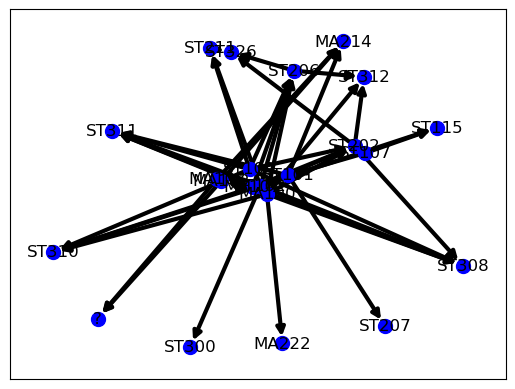

In [27]:
nx.draw_networkx(
    graph,
    arrows=True,
    node_color='blue',
    node_size=100,
    width=3,
    arrowstyle='-|>',
    arrowsize=12,
)
